PoolFormer
====


**MetaFormer Is Actually What You Need for Vision**

 * Paper: https://arxiv.org/abs/2111.11418

![PoolFormer Architecture](../assets/poolformer_architecture.png)

![PoolFormer Comparison](../assets/poolformer_comparison.png)

In [ ]:
import os
from PIL import Image
import torch
from transformers import (
    PoolFormerFeatureExtractor,
    PoolFormerForImageClassification
)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
feature_extractor = PoolFormerFeatureExtractor.from_pretrained(
    "sail/poolformer_s12"
)
model = PoolFormerForImageClassification.from_pretrained(
    "sail/poolformer_s12"
).eval().to(device)

/home/pyml/anaconda3/envs/py311/lib/python3.10/site-packages/transformers/models/poolformer/feature_extraction_poolformer.py:28: FutureWarning: The class PoolFormerFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use PoolFormerImageProcessor instead.
  warnings.warn(


In [2]:
image_path = "../samples/plants.jpg"
image = Image.open(image_path)

inputs = feature_extractor(images=image, return_tensors="pt")
inputs = inputs.to(device)

with torch.no_grad():
    outputs = model(**inputs)
logits = outputs.logits
# model predicts one of the 1000 ImageNet classes
predicted_class_idx = logits.argmax(-1).item()
print("Predicted class:", model.config.id2label[predicted_class_idx])


Predicted class: pot, flowerpot


In [16]:
import matplotlib.pyplot as plt
import numpy as np


def plot_top5_probs(
        probs, class_names, title="Top-5 Predictions"
    ):

    x = list(range(1, 6))

    plt.figure(figsize=(6, 4))
    bars = plt.bar(x, probs)
    plt.xticks(x)
    plt.ylim(0, 1.0)
    plt.ylabel("Probability")
    plt.title(title)

    # Add class names in top-left corner
    text_block = "\n".join([
        f"{i+1}. {name[:20]} ({probs[i]:.2f})"
        for i, name in enumerate(class_names)
    ])
    plt.gca().text(
        0.95, 0.95, text_block,
        transform=plt.gca().transAxes,
        verticalalignment='top', horizontalalignment='right',
        bbox=dict(
            facecolor='white',
            edgecolor='gray',
            boxstyle='round'
        )
    )

    plt.tight_layout()
    plt.show()

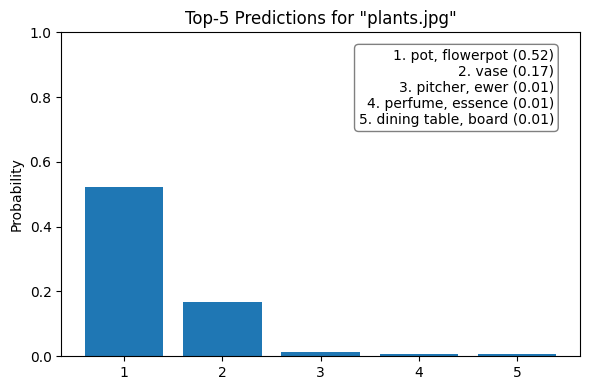

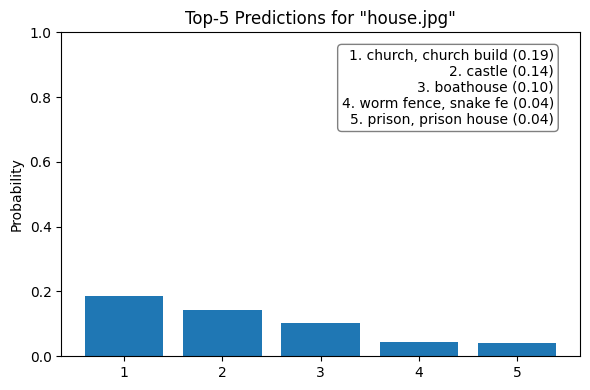

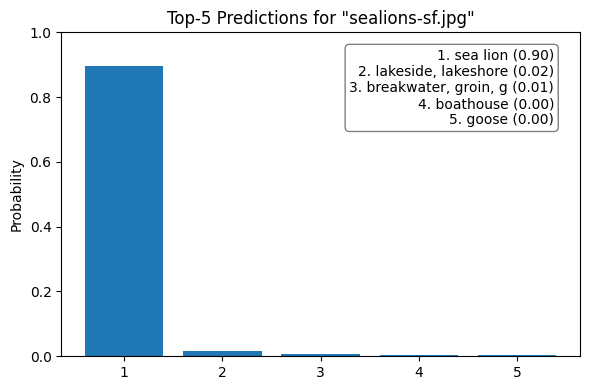

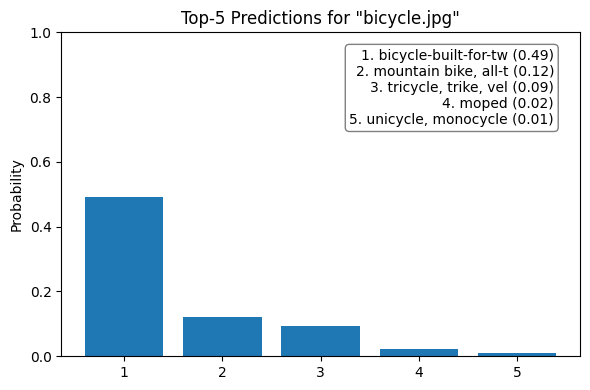

In [17]:
image_files = [
    "../samples/plants.jpg",
    "../samples/house.jpg",
    "../samples/sealions-sf.jpg",
    "../samples/bicycle.jpg"
]


for image_path in image_files:
    image = Image.open(image_path)
    inputs = feature_extractor(images=image, return_tensors="pt")
    inputs = inputs.to(device)

    with torch.no_grad():
        outputs = model(**inputs)
    logits = outputs.logits
    # model predicts one of the 1000 ImageNet classes

    top5_probabilities, top5_class_indices = torch.topk(logits.softmax(dim=1), k=5)
    top5_probabilities = top5_probabilities[0].cpu().numpy()
    top5_class_indices = top5_class_indices[0].cpu().numpy()

    # Get the class names
    class_names = model.config.id2label
    top5_labels = [class_names[i] for i in top5_class_indices]
    top5_probs = top5_probabilities.tolist()
    filename = os.path.basename(image_path)

    plot_top5_probs(
        top5_probabilities, top5_labels,
        title=f'Top-5 Predictions for "{filename}"'
    )
